# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

### Setup
------

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#Import mouse_metadata file
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16


In [3]:
#Import Study_data file
study_results_path = "data/Study_results.csv"
study_results_df = pd.read_csv(study_results_path)
study_results_df.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0


In [4]:
# Combine the data into a single DataFrame
merged_results_df=pd.merge(mouse_metadata_df,study_results_df, on = ["Mouse ID"], how = "inner")


In [5]:
# Display the data table for preview
merged_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking for missing data
merged_results_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Checking the number of mice.
mouse_ids = merged_results_df["Mouse ID"].unique()
mouse_num = len(mouse_ids)
print (f'There are {mouse_num} mice.')

There are 249 mice.


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID.

duplicate_etries = merged_results_df[merged_results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_etries 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cln_merged_results_df=merged_results_df.loc[merged_results_df["Mouse ID"] != "g989"]
# Display the dataframe
cln_merged_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_ids = cln_merged_results_df["Mouse ID"].unique()
mouse_num = len(mouse_ids)
print (f'There are {mouse_num} mice.')

There are 248 mice.


## Summary Statistics

In [11]:
# Create dataframe of tumor volumes grouped by drug regimen for analysis
groupby_regimen_tumor_volue_df = cln_merged_results_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

In [65]:
# Generate dataframe of mean tumor volumes by regimen
mean_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.mean())
mean_tumor_volume_df = mean_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
mean_tumor_volume_df.head(1)

,Mean Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741


In [13]:
# Generate dataframe of median tumor volumes by regimen
median_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.median())
median_tumor_volume_df = median_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
median_tumor_volume_df.head(1)

,Median Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809


In [14]:
# Generate dataframe of standard deviations of tumor volumes by regimen
var_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.var(ddof=0))
var_tumor_volume_df = var_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Variance of Tumor Volume (mm3)"})
var_tumor_volume_df.head(1)

,Variance of Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.839296


In [15]:
# Generate dataframe of standard deviations of tumor volumes by regimen
std_dev_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.std(ddof=0))
std_dev_tumor_volume_df = std_dev_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation of Tumor Volume (mm3)"})
std_dev_tumor_volume_df.head(1)

,Standard Deviation of Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.983904


In [16]:
# Generate dataframe of standard error of tumor volumes by regimen
sem_tumor_volume_df = pd.DataFrame(groupby_regimen_tumor_volue_df.sem())
sem_tumor_volume_df = sem_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Standard Error of Tumor Volume (mm3)"})
sem_tumor_volume_df.head(1)

,Standard Error of Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346


In [17]:
# Assemble the resulting dataframes into a single summary DataFrame
regimen_tumor_volue_summary_df = mean_tumor_volume_df
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,median_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,var_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,std_dev_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df=pd.merge(regimen_tumor_volue_summary_df,sem_tumor_volume_df, on = ["Drug Regimen"], how = "inner")
regimen_tumor_volue_summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

### Bar Charts
-------

In [53]:
# Create dataframe to chart
bar_chart_data = cln_merged_results_df.groupby(["Drug Regimen"])["Mouse ID"].count()
bar_chart_df = pd.DataFrame(bar_chart_data)
bar_chart_df = bar_chart_df.rename(columns={"Mouse ID":"Rows of Data"})
bar_chart_df.head(1)

,Rows of Data
Drug Regimen,
Capomulin,230


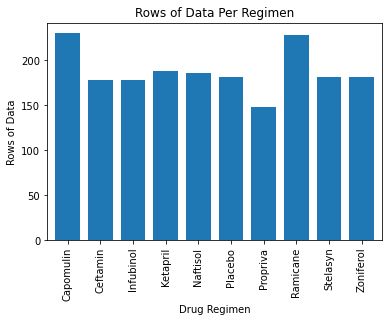

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar1_chart = bar_chart_df.plot (kind="bar", title="Rows of Data Per Regimen", legend=False, width=.75)
bar1_chart.set_ylabel("Rows of Data")
bar1_chart

<function matplotlib.pyplot.show(*args, **kw)>

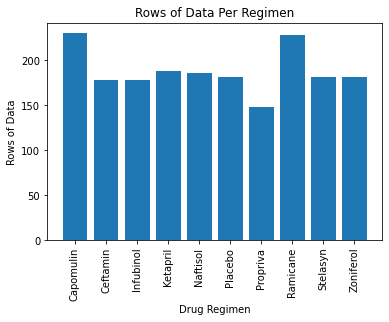

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar2_chart = plt.bar(bar_chart_df.index,bar_chart_df["Rows of Data"])
plt.xticks(rotation=90)
plt.xlabel ("Drug Regimen")
plt.ylabel ("Rows of Data")
plt.title ("Rows of Data Per Regimen")
plt.show

### Pie Charts
-------

In [70]:
# Create dataframe to chart
pie_chart_data = cln_merged_results_df.groupby(["Sex"])["Mouse ID"].count()
pie_chart_df = pd.DataFrame(pie_chart_data)
pie_chart_df = pie_chart_df.rename(columns={"Mouse ID":"Total Mice"})
pie_chart_df

,Total Mice
Sex,
Female,922
Male,958


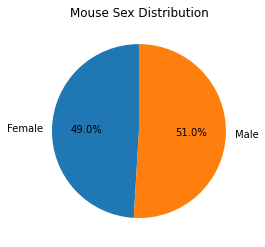

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie1_chart = pie_chart_df["Total Mice"].plot (kind="pie", title="Mouse Sex Distribution", startangle=90, autopct='%1.1f%%')
pie1_chart.set_ylabel("")
pie1_chart

<function matplotlib.pyplot.show(*args, **kw)>

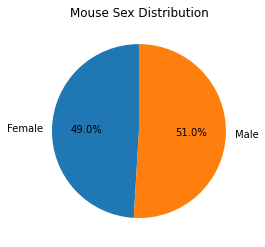

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2_chart = plt.pie(pie_chart_df["Total Mice"], labels=pie_chart_df.index, startangle=90, autopct='%1.1f%%')
plt.title ("Mouse Sex Distribution")

plt.show

## Quartiles, Outliers and Boxplots

In [192]:
cln_merged_results_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [193]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse
grouped_final_tumor_volume = cln_merged_results_df.groupby(["Mouse ID"])["Timepoint"].max()
grouped_final_tumor_volume_df = pd.DataFrame(grouped_final_tumor_volume)
grouped_final_tumor_volume_df = grouped_final_tumor_volume_df.rename(columns={"Timepoint":"Final Timepoint"})
grouped_final_tumor_volume_df.head(1)

,Final Timepoint
Mouse ID,
a203,45


In [194]:
# Merge this grouped DataFrame with the original cleaned DataFrame
new_cln_merged_results_df = pd.merge(cln_merged_results_df,grouped_final_tumor_volume_df, on = ["Mouse ID"], how = "inner")
new_cln_merged_results_df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Timepoint
0,k403,Ramicane,Male,21,16,0,45.0,0,45


In [195]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

In [196]:
for treatment in promising_treatments:
    treatment_vol_data = new_cln_merged_results_df.loc[(new_cln_merged_results_df["Drug Regimen"] == treatment) & (new_cln_merged_results_df["Timepoint"] == new_cln_merged_results_df["Final Timepoint"]), ["Tumor Volume (mm3)"]]
    tumor_vol_data.append(treatment_vol_data)

In [185]:
#Capomulin_final_tumor_volumes = new_cln_merged_results_df.loc[(new_cln_merged_results_df["Drug Regimen"] == "Capomulin"), :]
#Capomulin_final_tumor_volumes = Capomulin_final_tumor_volumes.loc[(Capomulin_final_tumor_volumes["Timepoint"] == Capomulin_final_tumor_volumes["Final Timepoint"]),:]
#Capomulin_final_tumor_volumes.head(1)

In [186]:
Capomulin_final_tumor_volumes = new_cln_merged_results_df.loc[(new_cln_merged_results_df["Drug Regimen"] == "Capomulin") & 
(new_cln_merged_results_df["Timepoint"] == new_cln_merged_results_df["Final Timepoint"]), ["Tumor Volume (mm3)"]]
Capomulin_final_tumor_volumes.head(1)

,Tumor Volume (mm3)
19,23.343598


In [137]:
# Create dataframe of final tumor volume for mine in Capomulin, Ramicane, Infubinol, and Ceftamin regimens
# Change index for use of loc
final_tumor_volume_df = cln_merged_results_df.set_index("Drug Regimen",drop=True)
final_tumor_volume_df = final_tumor_volume_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
final_tumor_volume_df = final_tumor_volume_df.loc[final_tumor_volume_df["Timepoint"] == 45]
final_tumor_volume_df = final_tumor_volume_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
final_tumor_volume_df = final_tumor_volume_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
final_tumor_volume_df

,Mouse ID,Timepoint,Final Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,s185,45,23.343598
Capomulin,x401,45,28.484033
Capomulin,m601,45,28.430964
Capomulin,u364,45,31.023923
Capomulin,y793,45,31.896238
...,...,...,...
Ceftamin,w151,45,67.527482
Ceftamin,x581,45,64.634949
Ceftamin,x822,45,61.386660


In [138]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_cln_merged_results_df=pd.merge(cln_merged_results_df,final_tumor_volume_df, on = ["Mouse ID"], how = "right")
new_cln_merged_results_df = new_cln_merged_results_df.sort_values("Mouse ID", ascending =True)
new_cln_merged_results_df = new_cln_merged_results_df.reset_index(drop=True)
new_cln_merged_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y,Final Tumor Volume (mm3)
0,a203,Infubinol,Female,20,23,35,61.931650,2,45,67.973419
1,a203,Infubinol,Female,20,23,40,63.593490,2,45,67.973419
2,a203,Infubinol,Female,20,23,30,59.523197,1,45,67.973419
3,a203,Infubinol,Female,20,23,25,56.793208,1,45,67.973419
4,a203,Infubinol,Female,20,23,20,55.173336,1,45,67.973419
...,...,...,...,...,...,...,...,...,...,...
625,z581,Infubinol,Female,24,25,15,51.196304,2,45,62.754451
626,z581,Infubinol,Female,24,25,10,50.478750,2,45,62.754451
627,z581,Infubinol,Female,24,25,5,49.273092,1,45,62.754451
628,z581,Infubinol,Female,24,25,20,51.807944,2,45,62.754451


In [132]:
test_new_cln_merged_results_df=new_cln_merged_results_df.set_index("Drug Regimen")
test_new_cln_merged_results_df.head(1)

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
Drug Regimen,,,,,,,,
Infubinol,a203,Female,20,23,35,61.93165,2,67.973419


In [135]:
test_new_cln_merged_results_df.loc["Capomulin","Final Tumor Volume (mm3)"]

Drug Regimen
Capomulin    38.982878
Capomulin    38.982878
Capomulin    38.982878
Capomulin    38.982878
Capomulin    38.982878
               ...    
Capomulin    31.896238
Capomulin    31.896238
Capomulin    31.896238
Capomulin    31.896238
Capomulin    31.896238
Name: Final Tumor Volume (mm3), Length: 210, dtype: float64

In [124]:
for treatment in promising_treatments:
    loc


67.97341878

In [28]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
